In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/EmployeeAttrition

/content/gdrive/My Drive/EmployeeAttrition


In [3]:
!ls

kaggle.json  WA_Fn-UseC_-HR-Employee-Attrition.csv


#Downloading the dataset to Google Drive

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/EmployeeAttrition"

In [ ]:
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset

  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 7.38MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  ibm-hr-analytics-attrition-dataset.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [ ]:
!ls

WA_Fn-UseC_-HR-Employee-Attrition.csv


#Importing the dataset

Import libraires

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset

In [5]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
Y=df["Attrition"]
X=df.drop(columns=["Attrition"])

#Data Exploration

Some general information about the dataset


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Some text formatting to make the text more presentable <br>
[Source](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python)

In [8]:
# choose your favourite color 
class Color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

For each column with string/categorical values,let's see the kind of values it has

In [9]:
print(Color.BOLD+"COLUMNS"+(55-len("COLUMNS"))*" "+"Description"+Color.END)
for column in X.columns:
  if str(X[column].dtypes) not in ["int64","int"]:
    info=X.groupby(column).count().iloc[:,0].to_dict() 
    print(Color.BOLD+column+Color.END+(50-len(column))*"-",info)

COLUMNS                                                Description
BusinessTravel------------------------------------ {'Non-Travel': 150, 'Travel_Frequently': 277, 'Travel_Rarely': 1043}
Department---------------------------------------- {'Human Resources': 63, 'Research & Development': 961, 'Sales': 446}
EducationField------------------------------------ {'Human Resources': 27, 'Life Sciences': 606, 'Marketing': 159, 'Medical': 464, 'Other': 82, 'Technical Degree': 132}
Gender-------------------------------------------- {'Female': 588, 'Male': 882}
JobRole------------------------------------------- {'Healthcare Representative': 131, 'Human Resources': 52, 'Laboratory Technician': 259, 'Manager': 102, 'Manufacturing Director': 145, 'Research Director': 80, 'Research Scientist': 292, 'Sales Executive': 326, 'Sales Representative': 83}
MaritalStatus------------------------------------- {'Divorced': 327, 'Married': 673, 'Single': 470}
Over18-------------------------------------------- {'Y

We can gather a lot of information from above. Some points to note are:


*   We can remove the Over18 column since all the values in this column are same
*   Some information that can be gathered from the values of the other column: <br>1. Most people do not work overtime.<br>2.The majority of people travel rarely and have stationary jobs.<br>3.Majority (65%) people in the dataset work in the research and development department .


---










Now we look at the distribution of the columns with integer values . We also gather some basic information about the values in these columns

In [10]:
integer_columns=[ column for column in X.columns if str(X[column].dtypes) == "int64"]

**KDEplots**
<br>
Kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.

[Source](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


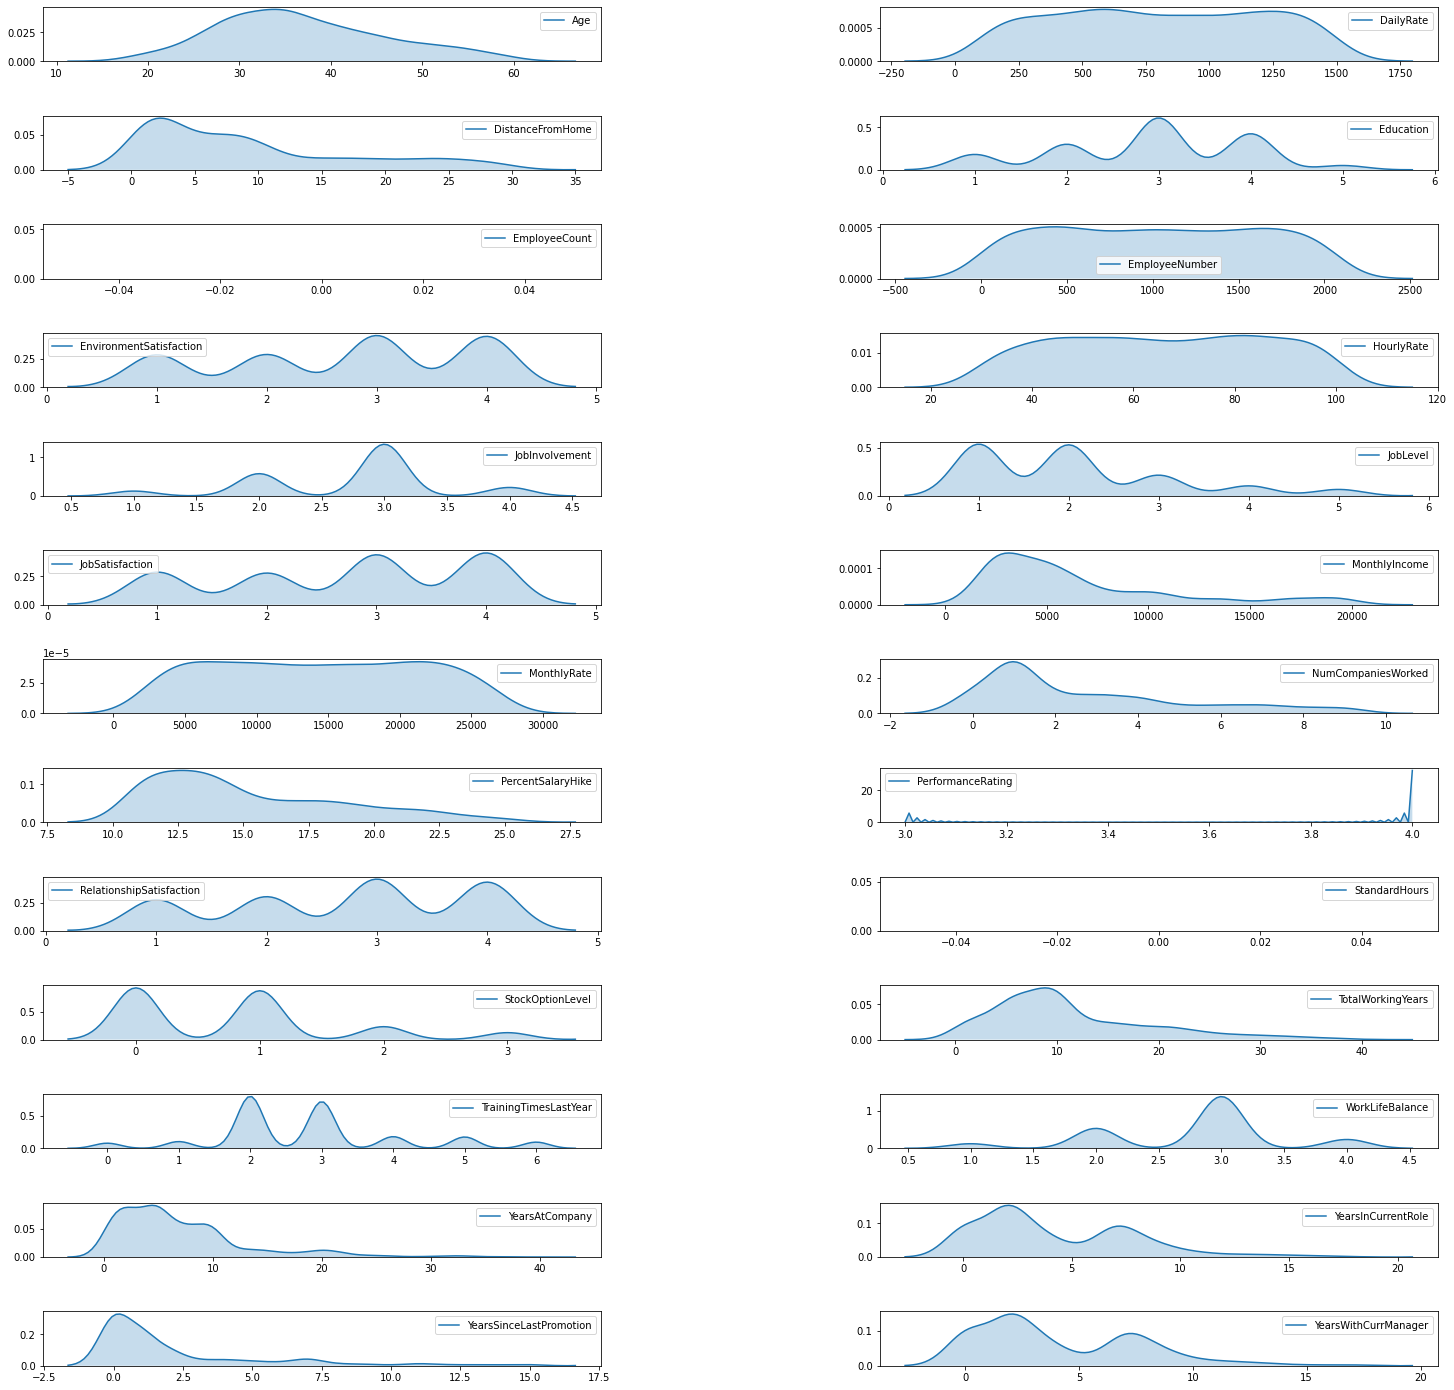

In [11]:
import seaborn as sns
fig=plt.figure()
fig.set_size_inches(25, 25)
fig.subplots_adjust(hspace=1,wspace=0.5)
for i in range(len(integer_columns)):
  ax=fig.add_subplot(13,2,i+1)
  sns.kdeplot(X[integer_columns[i]],shade=True) #adding kdeplots
plt.show()

Now lets look at the :


1.   Min and Max value of the columns
2.   Std. deviation 
3. Average value 
4.Range 



In [12]:
print(Color.BOLD+"COLUMNS"+(55-len("COLUMNS"))*" "+"Information"+Color.END)
for column in integer_columns:
  info={}
  info["Min"]=X[column].min()
  info["Max"]=X[column].max()
  info["Range"]=info["Max"]-info["Min"]
  info["Std. dev"]=X[column].std()
  info["Average"]=X[column].mean()
  print(Color.BOLD+column+Color.END+(50-len(column))*" ",info)

COLUMNS                                                Information
Age                                                {'Min': 18, 'Max': 60, 'Range': 42, 'Std. dev': 9.135373489136734, 'Average': 36.923809523809524}
DailyRate                                          {'Min': 102, 'Max': 1499, 'Range': 1397, 'Std. dev': 403.50909994352827, 'Average': 802.4857142857143}
DistanceFromHome                                   {'Min': 1, 'Max': 29, 'Range': 28, 'Std. dev': 8.106864435666084, 'Average': 9.19251700680272}
Education                                          {'Min': 1, 'Max': 5, 'Range': 4, 'Std. dev': 1.0241649445978729, 'Average': 2.912925170068027}
EmployeeCount                                      {'Min': 1, 'Max': 1, 'Range': 0, 'Std. dev': 0.0, 'Average': 1.0}
EmployeeNumber                                     {'Min': 1, 'Max': 2068, 'Range': 2067, 'Std. dev': 602.024334847475, 'Average': 1024.865306122449}
EnvironmentSatisfaction                            {'Min': 1, 'Max': 4,

Some points to note from the above cells  are :


1.   There are some columns which can be removed  ( EmployeeCount, EmployeeNumber, StandardHours )
2.   The average of EnvironmentSatisfication suggests that most of the employees are satisfied with their work environment (same with JobSatisfaction),but the average is only slightly above the middle value of the min and max of the column ((1+4)/2=2.5)
3. Their are some employees that are  working in the same company for  40 years. (YearsAtCompany)
4. Some employees did not receive a  single promotion in the last 15 years of their service.
5.On an average, employees have been working under the same manager for over 4 years.

Alot of other details can be gathered from the above statistics and plots. 

---



Now we will look at the relation between interger columns and the Y (target column ) of the dataset.



In [13]:
def convert_to_int(val):
  if val =="Yes":
    return 1
  else:
    return 0
df["Attrition"]=list(map(convert_to_int,df["Attrition"]))
df  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


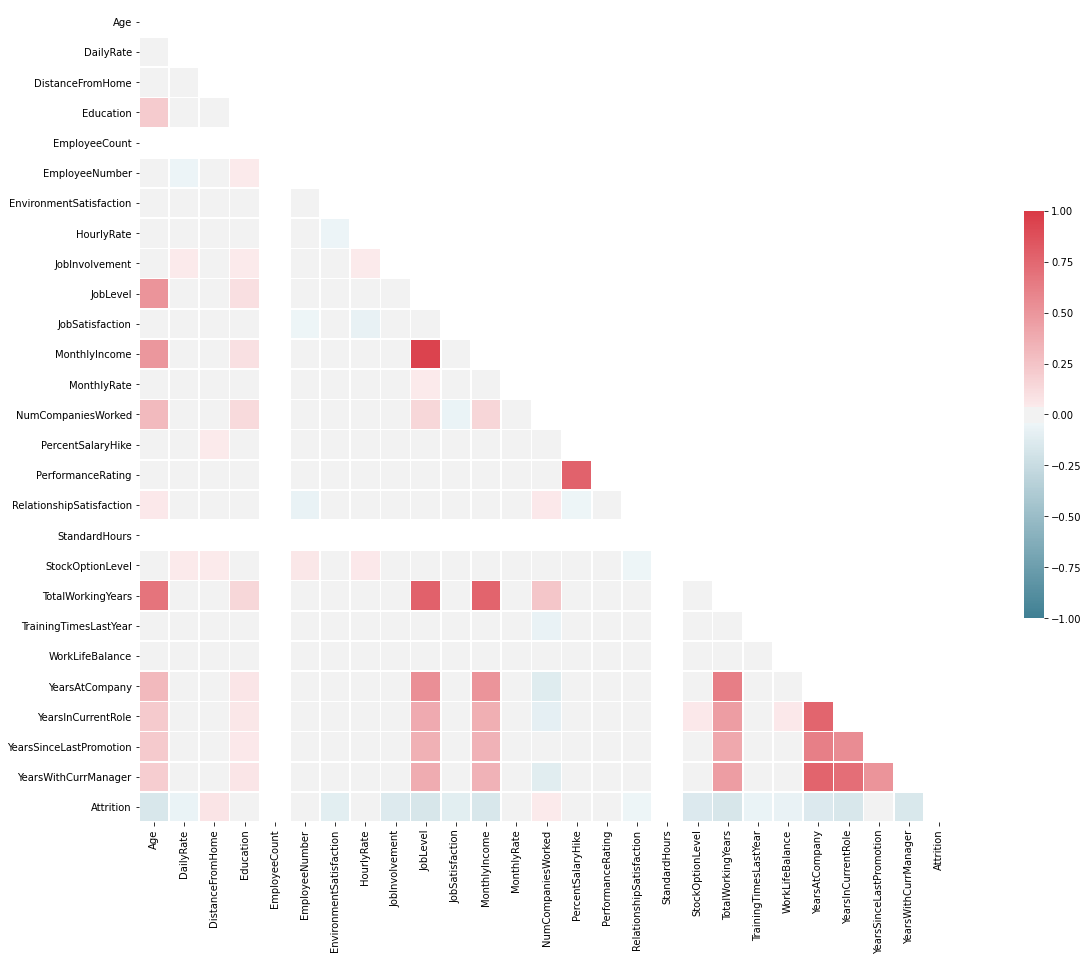

In [14]:
integer_columns.append("Attrition")
correlation=df[integer_columns].corr()
mask=np.triu(np.ones_like(correlation,dtype=np.bool))
f,ax=plt.subplots(figsize=(25,15))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(correlation,mask=mask,cmap=cmap,vmax=1,vmin=-1,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

Some highly correlated columns are:


*   MonthlyIncome and JobLevel
*   TotalWorkingYears and JobLevel
*  TotalWorkingYears and Monthly Income
*  PerformanceRating and PercentSalaryHike


There are other corrleted columns but let's look at these 

In [15]:
correlation["MonthlyIncome"]["JobLevel"] 

0.950299913479854

In [16]:
correlation["TotalWorkingYears"]["JobLevel"] 

0.7822078045362802

In [17]:
correlation["TotalWorkingYears"]["MonthlyIncome"] 

0.7728932462543548

In [18]:
correlation["PerformanceRating"]["PercentSalaryHike"] 

0.7735499964012668

Let's try to see all the highly correlated columns 

In [19]:
k={} #empty dictionary
for i in correlation.columns:
  cor_dict=correlation[i].to_dict()
  for j in cor_dict:
    if 0.70<=cor_dict[j]<1: #correlation is greater than .70
      k[cor_dict[j]]=sorted((i,j))

k  #dictionary contains the correlation value and the columns names

{0.7143647616385903: ['YearsInCurrentRole', 'YearsWithCurrManager'],
 0.7587537366134616: ['YearsAtCompany', 'YearsInCurrentRole'],
 0.7692124251006991: ['YearsAtCompany', 'YearsWithCurrManager'],
 0.7728932462543548: ['MonthlyIncome', 'TotalWorkingYears'],
 0.7735499964012668: ['PercentSalaryHike', 'PerformanceRating'],
 0.7822078045362802: ['JobLevel', 'TotalWorkingYears'],
 0.950299913479854: ['JobLevel', 'MonthlyIncome']}



---

Let's conclude the data exploration. From above we can see that there are some columns which can be removed without affecting our ability to predict the target variable:


*   Over18
*   EmployeeCount
* EmployeeNumber
* StandardHours
* MonthlyIncome (highly correlated to JobLevel)
* TotalWorkingYears (highly correlated to JobLevel)
*  YearsAtCompany (highly correlated to YearsWithCurrManager)
* YearsInCurrentRole (highly correlated to YearsWithCurrManager)
* PerformanceRating (highly correlated to PercentSalaryHike)

Furthermore there are a lot of interesting questions that can be asked from the observations gathered during the exploratory data analysis



---
Let's remove these unnecessary columns and get ready to dump our data in the DL model


In [20]:
X.drop(columns=["Over18",
"EmployeeCount",
"EmployeeNumber",
"StandardHours",
"MonthlyIncome", 
"TotalWorkingYears", 
"YearsAtCompany" ,
"YearsInCurrentRole", 
"PerformanceRating"
],inplace=True)

In [21]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Yes,11,1,0,0,1,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,24907,1,No,23,4,1,3,3,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Yes,15,2,0,3,3,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Yes,11,3,0,3,3,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,No,12,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,12290,4,No,17,3,1,3,3,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,21457,4,No,15,1,1,5,3,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,5174,1,Yes,20,2,1,0,3,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,13243,2,No,14,4,0,3,2,0,8


Before moving forward , we need to look at the balance of the dataset

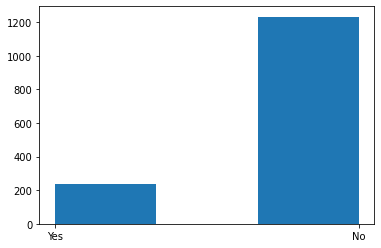

In [22]:
plt.hist(Y,bins=3)
plt.show()

The dataset is extremely imbalanced. So we need to use a resampling technique to handle the imbalance in the dataset.

#Data preprocessing

Encoding the target values

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(Y)
y

array([1, 0, 1, ..., 0, 0, 0])

Categorical encoding and dummy coding

In [24]:
x=pd.get_dummies(X,drop_first=True) #dummy coding all the string variables

In [25]:
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,8,11,1,0,0,1,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,24907,1,23,4,1,3,3,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2396,6,15,2,0,3,3,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,23159,1,11,3,0,3,3,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,16632,9,12,4,1,3,3,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,12290,4,17,3,1,3,3,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,21457,4,15,1,1,5,3,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,2,5174,1,20,2,1,0,3,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,2,13243,2,14,4,0,3,2,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


Splitting into training set and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

Now, we will resample the dataset since it is terribly imbalanced.<br>We will use **ADASYN** to resample our dataset and increase the instances of the minority classes.
ADASYN is used to generate synthetic data and is a similar approach to SMOTE with a few important differences.**Read about ADASYN  [here](https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa)**

In [27]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN(sampling_strategy=0.5,random_state=42) #the ratio between the majority and minority class can be changed
X_res,y_res=adasyn.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Scaling the numerical values in the dataset


---


**Normalize data before or after split of training and testing data?**

You first need to split the data into training and test set (validation set could be useful too).

The testing data points represent real-world data. Feature normalization (or data standardization) of the explanatory (or predictor) variables is a technique used to center and normalise the data by subtracting the mean and dividing by the variance. If you take the mean and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance).This will become a source of data leakage (target leakage)

Therefore, you should perform feature normalisation over the training data. Then perform normalisation on testing instances as well, but this time using the mean and variance of training explanatory variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

[Source](https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data)

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_res=sc_X.fit_transform(X_res)
X_test=sc_X.transform(X_test)

In [29]:
X_val=X_test #for later use, during explaining the model

In [30]:
X_res

array([[-0.89425104,  0.96473264, -0.05061127, ...,  1.22900487,
        -0.67385962, -0.61558701],
       [-1.91157926, -1.31668805,  2.00740183, ..., -0.81366643,
         1.48398862,  1.62446572],
       [ 2.15773363, -1.31157849,  0.46389201, ..., -0.81366643,
         1.48398862,  1.62446572],
       ...,
       [-0.6681781 , -0.55025333, -0.82236618, ..., -0.81366643,
        -0.67385962, -0.61558701],
       [ 1.70558775, -0.42762377,  0.20664037, ...,  1.22900487,
        -0.67385962,  1.62446572],
       [ 1.25344187, -0.16448118, -0.30786291, ..., -0.81366643,
        -0.67385962,  1.62446572]])

In [31]:
X_test

array([[-1.68550632,  1.65196911,  1.1070211 , ..., -0.81366643,
         1.48398862, -0.61558701],
       [ 1.1404054 ,  0.88042482,  0.07801455, ...,  1.22900487,
        -0.67385962,  1.62446572],
       [-0.55514163,  1.40926478,  0.20664037, ...,  1.22900487,
        -0.67385962,  1.62446572],
       ...,
       [ 0.801296  ,  0.45122138,  2.39327928, ..., -0.81366643,
         1.48398862, -0.61558701],
       [-0.55514163,  0.88042482, -0.30786291, ...,  1.22900487,
        -0.67385962, -0.61558701],
       [ 0.57522306, -1.31157849,  0.07801455, ..., -0.81366643,
         1.48398862, -0.61558701]])

# Designing DL model

Now we will design our deep learning model

In [32]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

**How many number of layers and nodes should the Neural Network Have?** </br>
This is perhaps one of the most common questions that  comes up while designing a neural network.  And the problem is , there is no defined answers!!! There are just different approaches that can be applied to optimize the configuration of the neural network.
<br>

Keeping this in mind, there are some points to note:

1.   MLPs (Multi layer percertrons) are regarded to be universal approximators .So it's extremely useful to have multiple layers ,since they can approximate pretty much all the measurable functions there are.
2.   Also it's often advised that 
  * number of hidden layers equals one but multiple layers can also improve accuracy
  * the number of neurons in that layer is the mean of the neurons in the input and output layers.
3. Apart from this , there are several optimization methods that can be used to remove unnecessary nodes or layers .Some of which are :
  * Pruning
  *Grid search
  * Heuristic search using a Genetic algorithm or Bayesian Optimisation
  *Exhaustive search

For more information refer the following resources:

* [How many layers and Neurons](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) 
* [Configure the NN](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/)



---
Let's build our neural net


In [33]:
classifier=Sequential()
classifier.add(Dense(20,activation="relu",input_dim=X_res.shape[1])) #Hidden 1
classifier.add(Dropout(0.2)) # Dropout Layer
classifier.add(Dense(20,activation="relu")) #Hidden 2
classifier.add(Dropout(0.2)) # Dropout Layer
classifier.add(Dense(1,activation="sigmoid")) #Output Layer

Compiling the network and adding some hyperparameters

In [37]:
monitor=EarlyStopping(monitor="val_loss",
                      min_delta=1e-3,
                      patience=10,
                      verbose=1,
                      mode="auto",
                      restore_best_weights=True)  #Early Stopping   

optimizer=tensorflow.keras.optimizers.Adam(lr=0.001,decay=1e-6) #defining the optimizer 

classifier.compile(loss='binary_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy']) #compiling the neural network

classifier.fit(X_res,y_res,
               batch_size=5,epochs=50,
               callbacks=[monitor],
               validation_data=(X_test,y_test)) #fitting the classifier

Epoch 1/50
289/289 [==============================] - 1s 2ms/step - loss: 0.5813 - accuracy: 0.7071 - val_loss: 0.4025 - val_accuracy: 0.8605
Epoch 2/50
289/289 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8237 - val_loss: 0.3467 - val_accuracy: 0.8776
Epoch 3/50
289/289 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8584 - val_loss: 0.3343 - val_accuracy: 0.8673
Epoch 4/50
289/289 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8661 - val_loss: 0.3287 - val_accuracy: 0.8810
Epoch 5/50
289/289 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8716 - val_loss: 0.3279 - val_accuracy: 0.8776
Epoch 6/50
289/289 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8855 - val_loss: 0.3327 - val_accuracy: 0.8810
Epoch 7/50
289/289 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8779 - val_loss: 0.3218 - val_accuracy: 0.8844
Epoch 

Let's see the accuracy of our model

In [38]:
from sklearn.metrics import accuracy_score
pred = classifier.predict(X_test) #making predictions
predict_classes=np.array([1 if n[0]>=0.5 else 0 for n in pred]) #converting prediction probabilities to binary
expected_classes = y_test
correct = accuracy_score(expected_classes,predict_classes) #comparing
print(f"Accuracy: {correct}")

Accuracy: 0.8809523809523809


#K-fold cross validation

Using Stratified K-fold cross validation to test the accuracy of our model .

In [39]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(15 ,shuffle=True ,random_state=42)

oos_y=[]    #out of sample target variable list
oos_pred=[] # out of sample prediction list
fold=0      #fold number 

for train,test in kf.split(X_res,y_res):
  fold+=1
  print(f"Fold #{fold}")

  # defining training and test sets
  x_train=X_res[train]
  x_test=X_res[test]
  y_train=y_res[train]
  y_test=y_res[test]

  # model
  classifier=Sequential()
  classifier.add(Dense(20,activation="relu",input_dim=X_res.shape[1])) #Hidden 1
  classifier.add(Dropout(0.2)) # Dropout Layer
  classifier.add(Dense(20,activation="relu")) #Hidden 2
  classifier.add(Dropout(0.2)) # Dropout Layer
  classifier.add(Dense(1,activation="sigmoid")) #Output Layer
  classifier.compile(loss='binary_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy'])
  classifier.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,epochs=50)    
  pred = classifier.predict(x_test)
 
  # Making the out_of_sample lists
  pred=np.array([1 if n[0]>=0.5 else 0 for n in pred])
  oos_y.append(y_test)
  oos_pred.append(pred)

  # Measure this fold's accuracy
  score=accuracy_score(y_test,pred)
  print(f"Fold score (accuracy):{score}")

# concatenating the arrays from all the k-folds 
oos_y=np.concatenate(oos_y)
oos_pred=np.concatenate(oos_pred)

# Final score
score = accuracy_score(oos_y, oos_pred)
print(Color.BOLD+f"Final score (accuracy): {score}"+Color.END)

Fold #1
Fold score (accuracy):0.8350515463917526
Fold #2
Fold score (accuracy):0.8229166666666666
Fold #3
Fold score (accuracy):0.8645833333333334
Fold #4
Fold score (accuracy):0.875
Fold #5
Fold score (accuracy):0.90625
Fold #6
Fold score (accuracy):0.8958333333333334
Fold #7
Fold score (accuracy):0.8333333333333334
Fold #8
Fold score (accuracy):0.8958333333333334
Fold #9
Fold score (accuracy):0.84375
Fold #10
Fold score (accuracy):0.90625
Fold #11
Fold score (accuracy):0.8854166666666666
Fold #12
Fold score (accuracy):0.8645833333333334
Fold #13
Fold score (accuracy):0.9375
Fold #14
Fold score (accuracy):0.9375
Fold #15
Fold score (accuracy):0.8541666666666666
Final score (accuracy): 0.8771686328938237


#Explaining the Model

Installing the shap module

In [41]:
!pip install shap

     |████████████████████████████████| 327kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456463 sha256=6f5fa405902ef04f3206539ea934c9f021d408c821f09877520b54fa970d474e
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


After validating the accuracy of the model , we can now try to explain the model and see which features affect the prediction of the model and how. To do this ,we are going to use **SHAP values and summary plot**.

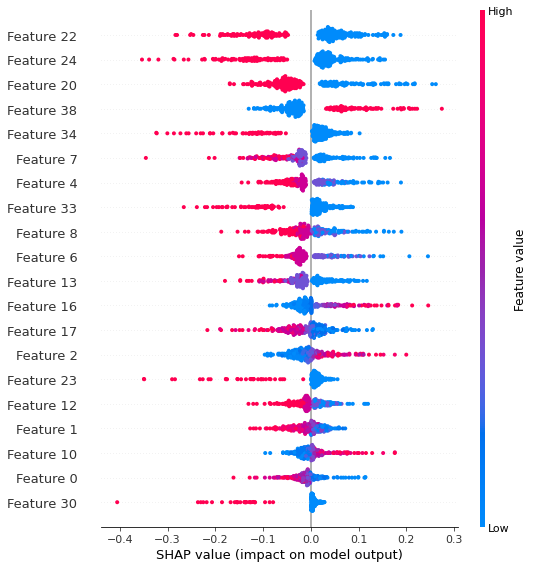

In [46]:
import shap
explainer=shap.DeepExplainer(classifier,X_res)
shap_values=explainer.shap_values(X_val)
shap.summary_plot(shap_values[0],X_val)

In [53]:
feature_names=list(x.columns)
indexes=[22,24,20,38,34,7,4,33,8,6,13,16,17,2,23,12,1,10,0,30]
for i in indexes:
  print(f"Feature at index {i}: {feature_names[i]}")

Feature at index 22: EducationField_Life Sciences
Feature at index 24: EducationField_Medical
Feature at index 20: Department_Research & Development
Feature at index 38: OverTime_Yes
Feature at index 34: JobRole_Sales Executive
Feature at index 7: JobLevel
Feature at index 4: EnvironmentSatisfaction
Feature at index 33: JobRole_Research Scientist
Feature at index 8: JobSatisfaction
Feature at index 6: JobInvolvement
Feature at index 13: StockOptionLevel
Feature at index 16: YearsSinceLastPromotion
Feature at index 17: YearsWithCurrManager
Feature at index 2: DistanceFromHome
Feature at index 23: EducationField_Marketing
Feature at index 12: RelationshipSatisfaction
Feature at index 1: DailyRate
Feature at index 10: NumCompaniesWorked
Feature at index 0: Age
Feature at index 30: JobRole_Manager


  The  summary plot gives us alot of new information to ponder upon.Some observations from above are:


*   The higher is a given employee's JobLevel , the lower are their chances of leaving the company.This could be because higher JobLevel employees receive higher salaries and more benefits . 
*   Another observation is that the lower is the EnvironmentSatisfaction rating given by an employee , the more likely is the employee to leave the company.(Same with JobSatisfaction and JobInvolvement)
* People working overtime are more likely to leave the company . This might be due to excessive work pressure and increased stress levels.
* Two columns JobRole_Sales Executive and EducationField_Marketing show similar distribution. Being a Sales Executive impacts the SHAP values immensely . Sales Executives are less likely to leave the company (This maybe due to the benefits or the salary given to sales executives) . Also people educated in Marketing are also less likely to leave the company.

More important observations can be made using the above summary plots and it can be used as a starting point to delve deeper into how the model works and what the predictions mean.


---




OKAY!!!! We have come a long way.This notebook is just an attempt to demonstrate how data analysis and deep learning can be used to solve a given problem and design an efficient system which helps in making better future decisions. Hope you enjoyed this journey !!! 